### Why this notebook?

This notebook notebook onwards we are going to jump into the depth of each model.

We are starting with the most basic modeling technique.

### `Regression`

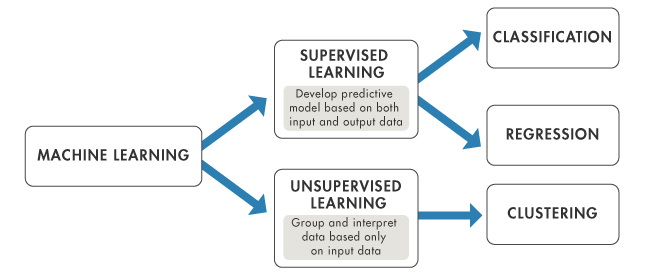

As we have already discussed which modeling technique we are going to use is governed by the type of data we have.

Whenever we have target variable as **`continuous`** only then we are going to use **`regression`**. Example of continuous 
1. Temprature
2. Weight
3. Price
4. Speed
5. Time
6. Height

Lets see how it works

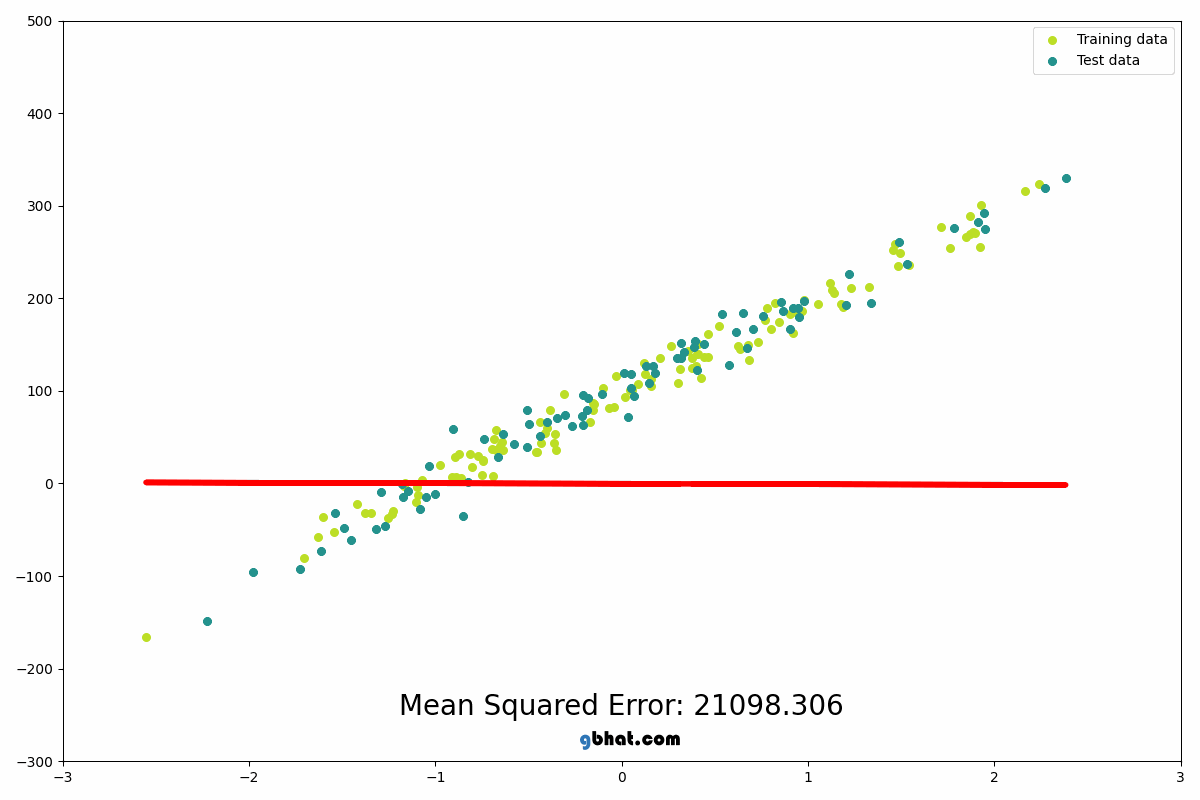

How do this happen? 

Ohh!! very simple **`machine sees the graph and draw the line for you`**, don't you think this is the right way to do it? It is the easiest thing so far we did in our course, isn't it?

Are you sure you are right?

Well you missed the most important part that **`Machine can't see anything`**. Then how it is done?

Well the math is there for you, but before going into the math lets intutively sees what happens

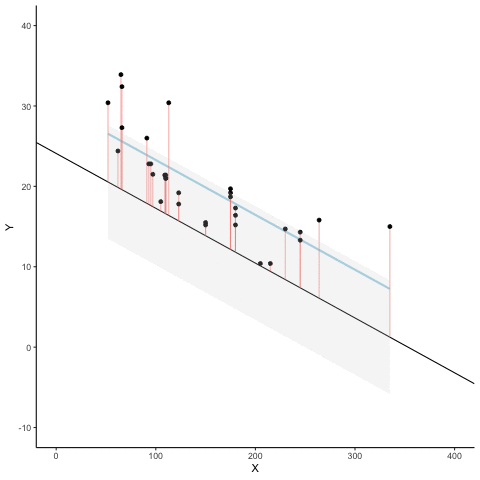

You draw a random line and then optimize it to fit on the data like we seen in the $2^{nd}$ image, but question in your mind might be how machine identifies it matched all the data if it can't see it.

Here co-ordinate geometry has the right tools for us to identify that, we check every point distance with respect to the line and sum it up, where this sum reaches to the lowest number we get to know that the line is the **`best fit line`** for this kind of data.

Here is the next image which shows how it is done.

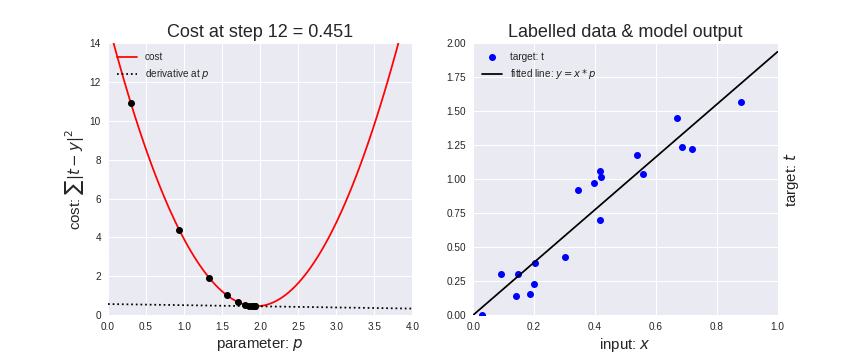



Here comes one catch we are not looking for the lowest point value, we are looking for the point where the curve of summation of distance attains lowest value possible, what does this means is you might have lowest single point on your curve but until and unless it is the minima we are not going to consider it.

Now what is this minima lets understand it

When you have just a point, you can't differntiate. Why differentiation is so important here? 

Our goal is to predict the future hance we need reliability that whatever we have is the lowest possible value, no matter from where we start or where we want to go we are sure what is happening. But what we know about a point is the value at that instant, nothing to left of the point or right to the point we know anything. Hence we only consider a point where we know the funcation has attained the lowest possible value.

Hence for any machine learning model to learn we need to have a continous function all the time. For example if we are choosing the model based on minima of below function it will be a problem for us as it will be unreliable, at one moment it is negative if you move 0.001 towards right you will have positive results

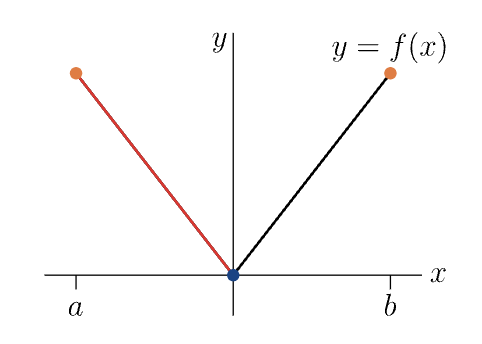

Hope now you understand the full intution behind the linear regression. Lets jump into the math part.

Here are the steps
1. Get a random line equation.
$$ Y = \theta_1*X + \theta_0$$
2. Now lets say you have points $(x_1,\; y_1),\;(x_2,\; y_2),\;...\;(x_N,\; y_N)\;$, we have to get each point distance from the line, here is how we get it
$$Cost\;Function = \sum_{i}^{N}((\theta_1*x_i+\theta_0)-y_i)^2$$
3. Since the above one is a continous function lets differentiate it.
$$\frac {\partial }{\partial \theta_0}[\sum_{i}^{N}((\theta_1*x_i+\theta_0)-y_i)^2]$$
$$\frac {\partial }{\partial \theta_1}[\sum_{i}^{N}((\theta_1*x_i+\theta_0)-y_i)^2]$$

Wait a minute! we know what $\theta$'s value then why are we differentiating it? Differentiation is done to understand the change but here we have a constant then why are we differentiating it?

Look the below picture clearly and you would be able to understand why

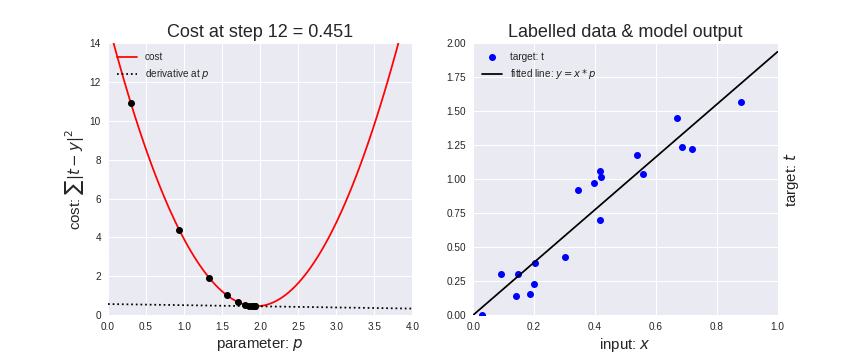

Let me give you a hint! What do you see changing in the right image?

Isn't it the slope and intercept?

Hence we differentiate it with respect to slope and intercept.

Next question of yours might be how the $\theta$ values are getting changed? Lets understand another equation which governs the change of $\theta$'s
$$\theta_{new_{i}} := \theta_{old_{i}} - \alpha * \frac {\partial }{\partial \theta_i}((\theta_1*x_i+\theta_0)-y_i)^2$$

So initially the $\theta$'s are going to be random but after that it is going to get update based on the above equation. The above equation make sure that in the end $\theta$'s are such that it will be best possible straight line passing through the data.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./LinearRegression.csv")
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


Same old way to do machine learning model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(df[['X']], df[['Y']], test_size=0.30, random_state=10)

In [15]:
regr = LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

What we studied when we are doing classification is a metric named as accuracy, that is only working in the scenario when we have of classification but not in regression. Obviously answer is there were limited classes and the prediction would be out of that limited set only, nothing else. But with regression predictions are not bounded at all. Hence we need to take some other evaluation startegy, which is known as R-Square.

Here is the equation of of R-Square
$$R^2 = 1-\frac{RSS}{TSS} = 1-\frac{\sum(y_i - \hat{y_i})^2}{\sum(y_i - \bar{y})^2}$$

TSS is Total sum of squares, Sum of squares when we consider every output to be $\bar{y}$

RSS is Residual sum of squares, Sum of squares when we consider output of our model

In [16]:
r2_score(y_test, y_pred)

0.8631973165107799

Lets see if our model is actually working or not?

In [17]:
regr.coef_

array([[0.64770457]])

In [18]:
regr.intercept_

array([5.08098935])

<AxesSubplot: xlabel='X', ylabel='Y'>

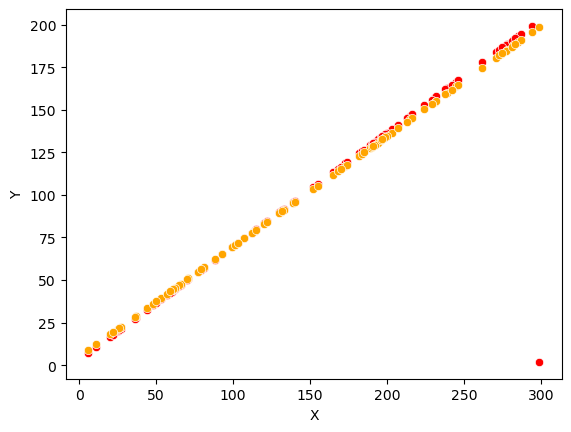

In [53]:
sns.scatterplot(x=x_test.X, y=y_test.Y, c='red')
sns.scatterplot(x=x_test.X.values, y=pd.DataFrame(data=y_pred, columns=['Y']).Y.values, c='orange')

Can you see how much red and orange are close to each other? Which shows our model is so close to the ground truth. This is exactly what we want from any model.

<AxesSubplot: xlabel='X', ylabel='Y'>

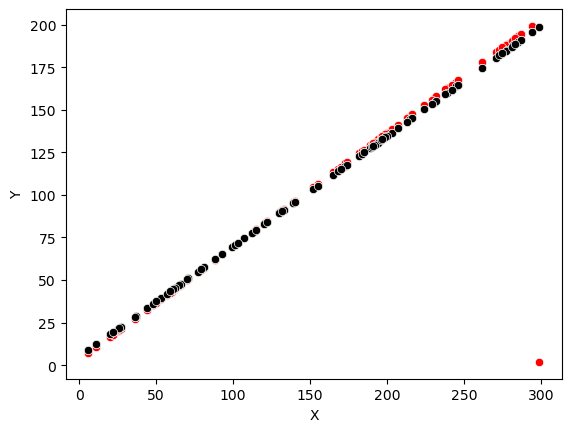

In [54]:
sns.scatterplot(x=x_test.X, y=y_test.Y, c='red')
sns.scatterplot(x=x_test.X.values, y=pd.DataFrame(data=y_pred, columns=['Y']).Y.values, c='orange')
sns.scatterplot(x=x_test.X.values, y=(x_test.X.values*0.64770457 + 5.08098935), c='black')